In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.models import Sequential
from keras.datasets import mnist
from keras.layers import Dense
from keras.optimizers import Adam
#because of multiclass datasets
from keras.utils.np_utils import to_categorical 
import random

Using TensorFlow backend.


In [ ]:
np.random.seed(0)

In [ ]:
#import 6000 images from mnist data set
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape[0])

(60000, 28, 28)
(10000, 28, 28)
60000


In [ ]:
#look for the condition throw error otherwise
assert(X_train.shape[0] == y_train.shape[0]), "The number of images is not equal .."
assert(X_test.shape[0] == y_test.shape[0]), "The number of images is not equal .."
assert(X_train.shape[1:] == (28, 28)), "The dimension of the images are not 28x28"
assert(X_test.shape[1:] == (28, 28)), "The dimension of the images are not 28x28"

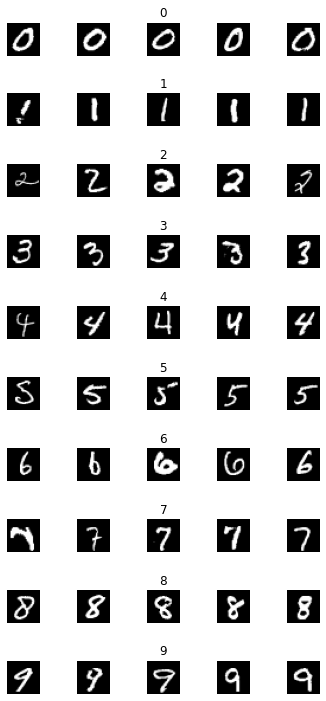

In [ ]:
num_of_samples = []

cols = 5
num_of_classes = 10

fig, axs = plt.subplots(nrows=num_of_classes, ncols=cols,
                       figsize=(5, 10))
fig.tight_layout()
for i in range(cols):
  for j in range(num_of_classes):
    x_selected = X_train[y_train == j]
    axs[j][i].imshow(x_selected[random.randint(0, len(x_selected -1)),
                                :, :],
                    cmap=plt.get_cmap('gray'))
    axs[j][i].axis("off")
    if i==2:
      axs[j][i].set_title(str(j))
      num_of_samples.append(len(x_selected))

[5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949]


Text(0, 0.5, 'Number of images')

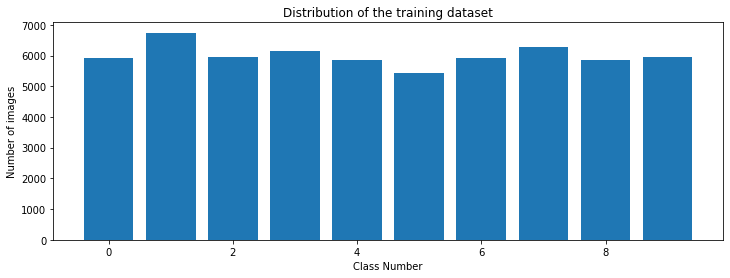

In [ ]:
print(num_of_samples)
plt.figure(figsize=(12, 4))
plt.bar(range(0, num_of_classes), num_of_samples)
plt.title("Distribution of the training dataset")
plt.xlabel("Class Number")
plt.ylabel("Number of images")

In [ ]:
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10) 

In [ ]:
#Each image has Intensity from 0 to 255
X_train = X_train/255 
X_test = X_test/255

In [ ]:
#we must change the shape of the images to 1d array(28*28)
#for multipication 1*784
num_pixels = 784
X_train = X_train.reshape(X_train.shape[0],
                         num_pixels)
X_test = X_test.reshape(X_test.shape[0],
                         num_pixels)
print(X_train.shape)

(60000, 784)


In [ ]:
def create_model():
  model = Sequential()
  model.add(Dense(10, input_dim = num_pixels,
                  activation = 'relu'))
  model.add(Dense(30, activation='relu'))
  model.add(Dense(10, activation='relu'))
  model.add(Dense(num_of_classes, activation='softmax'))
  model.compile(Adam(lr=0.01),
                loss='categorical_crossentropy',
               metrics=['accuracy'])
  return model           

In [ ]:
model = create_model()
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 10)                7850      
_________________________________________________________________
dense_2 (Dense)              (None, 30)                330       
_________________________________________________________________
dense_3 (Dense)              (None, 10)                310       
_________________________________________________________________
dense_4 (Dense)              (None, 10)                110       
Total params: 8,600
Trainable params: 8,600
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
history = model.fit(X_train, y_train, validation_split=0.1,
         epochs=10, batch_size=200, verbose=1, shuffle=1)

Train on 54000 samples, validate on 6000 samples
Epoch 1/10
54000/54000 [==============================] - 1s 22us/step - loss: 0.6337 - accuracy: 0.8054 - val_loss: 0.3146 - val_accuracy: 0.9088
Epoch 2/10
54000/54000 [==============================] - 1s 16us/step - loss: 0.3810 - accuracy: 0.8903 - val_loss: 0.2805 - val_accuracy: 0.9190
Epoch 3/10
54000/54000 [==============================] - 1s 16us/step - loss: 0.3399 - accuracy: 0.9011 - val_loss: 0.2803 - val_accuracy: 0.9152
Epoch 4/10
54000/54000 [==============================] - 1s 15us/step - loss: 0.3279 - accuracy: 0.9034 - val_loss: 0.2693 - val_accuracy: 0.9147
Epoch 5/10
54000/54000 [==============================] - 1s 15us/step - loss: 0.3140 - accuracy: 0.9072 - val_loss: 0.2668 - val_accuracy: 0.9163
Epoch 6/10
54000/54000 [==============================] - 1s 15us/step - loss: 0.3024 - accuracy: 0.9116 - val_loss: 0.2437 - val_accuracy: 0.9248
Epoch 7/10
54000/54000 [==============================] - 1s 16us/ste

Text(0.5, 0, 'epoch')

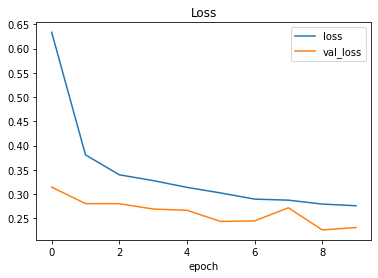

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['loss', 'val_loss'])
plt.title('Loss')
plt.xlabel('epoch')

In [ ]:
score = model.evaluate(X_test, y_test, verbose=0)
print(type(score))
print('Test Score:', score[0])
print('Test Accuracy:', score[1])

<class 'list'>
Test Score: 0.29166616716980936
Test Accuracy: 0.9124000072479248


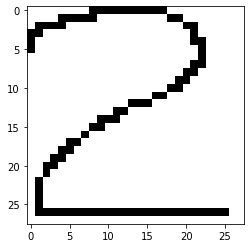

In [ ]:
import requests
from PIL import Image

url = 'https://www.researchgate.net/profile/Jose_Sempere/publication/221258631/figure/fig1/AS:305526891139075@1449854695342/Handwritten-digit-2.png'
response = requests.get(url, stream = True)
img = Image.open("/content/TestImage3.png")
plt.imshow(img)

[[  0   0   0   0   0   0   0   0 255 255 255 255 255 255 255 255 255 255
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0 255 255 255 255 255   0   0   0   0   0   0   0   0   0
  255 255   0   0   0   0   0   0   0   0]
 [  0 255 255 255 255   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0 255 255   0   0   0   0   0   0]
 [255 255   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0 255   0   0   0   0   0   0]
 [255   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0 255 255   0   0   0   0   0]
 [255   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0 255   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0 255   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0 255 255   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   

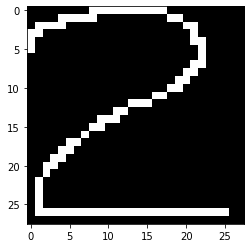

In [ ]:
import cv2

img_array = np.asarray(img)
resized = cv2.resize(img_array, (28, 28 ))
gray_scale = cv2.cvtColor(resized, cv2.COLOR_BGR2GRAY) #(28, 28)
image = cv2.bitwise_not(gray_scale)

plt.imshow(image, cmap=plt.get_cmap('gray'))
print(image)

In [ ]:
image = image / 255
image = image.reshape(1, 784)

In [ ]:
prediction = model.predict_classes(image)
print("predicted digit:", str(prediction))

predicted digit: [7]
